# Predicting Adoption Speed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
cat_df = pd.read_csv('../data/cat_df.csv')
dog_df = pd.read_csv('../data/dog_df.csv')

## Prepare Dog Data for modeling

In [3]:
dog_df.head()

,Unnamed: 0,id,intakedate,intakereason,istransfer,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,returndate,puttosleep,age(months),age(years),duration of stay
0,12,46238,2016-10-09 00:00:00,Abandoned,False,981020019070093,Tennessee,Heeler,Black and Brown,Dog,5 years 7 months,Male,Special Care Dogs,2018-02-14 00:00:00,Adoption,NaN,False,NaN,5.0,493.0
1,15,46693,2016-11-21 00:00:00,Abandoned,False,981020017897009,Baby,Pitbull,White,Dog,5 years 9 months,Male,Adoptable Dogs,2017-04-07 00:00:00,Adoption,NaN,False,NaN,5.0,137.0
2,19,47146,2017-01-17 00:00:00,Abandoned,False,981020021063793,Dinah,Labrador Retriever,Black,Dog,5 years 6 months,Female,Foster,2017-04-01 00:00:00,Adoption,NaN,False,NaN,5.0,74.0
3,27,47239,2017-01-27 00:00:00,Abandoned,False,981020021070452,Maria,NaN,Black and Brown,Dog,3 years 5 months,Female,Foster,2017-04-01 00:00:00,Adoption,NaN,False,NaN,3.0,64.0
4,33,47319,2017-02-05 00:00:00,other,False,NaN,Louise Vada,Pitbull,Black,Dog,4 years 5 months,Female,Stray Dogs Theta,2017-04-05 00:00:00,Reclaimed,NaN,False,NaN,4.0,59.0


In [4]:
dog_df['movementtype'].value_counts()

Adoption     2841
Reclaimed    1487
Transfer      107
Foster         34
Escaped         1
Name: movementtype, dtype: int64

There are only 34 fosters in this set and most of the fosters happen pretty quickly. Thats why I only use the entries that have adoptions as the movementtype. 

In [5]:
# create a subdataframe that only contains dogs that were adopted

dog_model_data = dog_df[dog_df['movementtype'] == 'Adoption']

Now I want to categorize my target column into these 2 values. 

- 0 — Pet took more than 21 days to get adopted after being listed.
- 1 — Pet took 21 days or less to get adopted.

In [6]:
#the duration of stay column is currently in days, I will divide it in into 2 values with the code below 

dog_model_data['duration of stay'][dog_model_data['duration of stay'] <= 21] = 1
dog_model_data['duration of stay'][dog_model_data['duration of stay'] > 21] = 0

In [7]:
dog_model_data['duration of stay'].value_counts()

1.0    1574
0.0    1267
Name: duration of stay, dtype: int64

In [8]:
 dog_model_data.head()

,Unnamed: 0,id,intakedate,intakereason,istransfer,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,returndate,puttosleep,age(months),age(years),duration of stay
0,12,46238,2016-10-09 00:00:00,Abandoned,False,981020019070093,Tennessee,Heeler,Black and Brown,Dog,5 years 7 months,Male,Special Care Dogs,2018-02-14 00:00:00,Adoption,NaN,False,NaN,5.0,0.0
1,15,46693,2016-11-21 00:00:00,Abandoned,False,981020017897009,Baby,Pitbull,White,Dog,5 years 9 months,Male,Adoptable Dogs,2017-04-07 00:00:00,Adoption,NaN,False,NaN,5.0,0.0
2,19,47146,2017-01-17 00:00:00,Abandoned,False,981020021063793,Dinah,Labrador Retriever,Black,Dog,5 years 6 months,Female,Foster,2017-04-01 00:00:00,Adoption,NaN,False,NaN,5.0,0.0
3,27,47239,2017-01-27 00:00:00,Abandoned,False,981020021070452,Maria,NaN,Black and Brown,Dog,3 years 5 months,Female,Foster,2017-04-01 00:00:00,Adoption,NaN,False,NaN,3.0,0.0
7,50,47502,2017-02-27 00:00:00,other,False,981020015101070,Zoey,Pitbull,Grey and White,Dog,5 years 4 months,Female,Stray Dogs Beta,2017-06-01 00:00:00,Adoption,NaN,False,NaN,5.0,0.0


In [9]:
dog_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841 entries, 0 to 4467
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2841 non-null   int64  
 1   id                2841 non-null   int64  
 2   intakedate        2841 non-null   object 
 3   intakereason      2841 non-null   object 
 4   istransfer        2841 non-null   bool   
 5   identichipnumber  2838 non-null   object 
 6   animalname        2841 non-null   object 
 7   breedname         2840 non-null   object 
 8   basecolour        2841 non-null   object 
 9   speciesname       2841 non-null   object 
 10  animalage         2841 non-null   object 
 11  sexname           2841 non-null   object 
 12  location          2841 non-null   object 
 13  movementdate      2841 non-null   object 
 14  movementtype      2841 non-null   object 
 15  returndate        55 non-null     object 
 16  puttosleep        2841 non-null   bool   


The months that have missing values means that age will be dictated by the years column, so we can fill the rest of the months column with zeroes, I did the same thing for the years column in my data cleaning notebook before saving the csv.

In [10]:
dog_model_data['age(months)'] = dog_model_data['age(months)'].fillna(0)

### Prepare Cat data for visualizations

In [11]:
cat_df.head()

,Unnamed: 0,id,intakedate,intakereason,istransfer,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,returndate,puttosleep,age(months),age(years),duration of stay
0,14,46437,2016-10-26 00:00:00,Abandoned,False,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months,Female,Stray Cats,2017-04-07 00:00:00,Adoption,02/09/2018 12:00:00 AM,True,NaN,12.0,163.0
1,17,47120,2017-01-11 00:00:00,Abandoned,False,981020021072899,Vivian,Other,Other,Cat,6 years 5 months,Female,Foster,2017-05-13 00:00:00,Adoption,NaN,False,NaN,6.0,122.0
2,26,47198,2017-01-22 00:00:00,Abandoned,False,981020021020775,Mama Mia,Domestic Short Hair,Grey and White,Cat,4 years 10 months,Female,Adoptable Cat Glass Colony,2017-06-22 00:00:00,Adoption,NaN,False,NaN,4.0,151.0
3,29,47248,2017-01-27 00:00:00,Abandoned,False,981020021068759,Mr. T,Other,Black,Cat,11 years 7 months,Male,Foster,2017-06-02 00:00:00,Adoption,NaN,False,NaN,11.0,126.0
4,30,47277,2017-01-31 00:00:00,Abandoned,False,981020021046006,Coraline,Domestic Short Hair,Brown and Black,Cat,5 years 5 months,Female,Adoptable Cat Glass Colony,2017-04-05 00:00:00,Adoption,NaN,False,NaN,5.0,64.0


In [12]:
#Create a subdataframe that only contains cats that were adopted
cat_model_data = cat_df[cat_df['movementtype'] == 'Adoption']

I am focusing on the pets that got adopted and analyzing how long it took. Some cats are sent to foster before 30 days but we dont want those to be included in our target

For cats I am using 30 days as the cutoff for the 2 categories of the target columns. Cats do not take up as much space on average as dogs, so it will take them longer to run out of space.

In [13]:
cat_model_data['duration of stay'][cat_model_data['duration of stay'] <= 30] = 1
cat_model_data['duration of stay'][cat_model_data['duration of stay'] > 30] = 0

In [14]:
cat_model_data['age(months)'] = cat_model_data['age(months)'].fillna(0)

In [15]:
df = pd.read_csv('../data/animal-care-and-control-data-set-2004-2020.csv')

In [16]:
df

,Year,Number of Employees,Number of Division Vehicles,Annual Budget,Owner Surrenders,Strays,Impounds by ACO (Added in 2015),Total Intake of Animals,Adoptions,Return to Owner,Euthanized,Transported to other shelters and rescues,Fostered Animals,Service Calls,Emergency Call-Outs,Grants Received,Annual Adoption Revenue
0,2004,15.150,3,"$782,931.00",2351,3257,NaN,5608,1896,558,2277,592,NaN,NaN,150,$0.00,"$13,146.00"
1,2005,16.600,3,"$760,206.00",2104,3038,NaN,5142,1866,542,1724,670,380.0,1525.0,150,"$18,925.00","$112,649.00"
2,2006,16.600,3,"$1,030,661.00",2361,2800,NaN,5161,1737,554,1856,657,700.0,2900.0,150,"$5,555.00","$105,401.00"
3,2007,17.230,3,"$1,062,946.00",2294,2519,NaN,4813,1825,523,1753,539,800.0,2950.0,150,$0.00,"$100,170.00"
4,2008,17.725,3,"$1,132,507.00",2131,2690,NaN,4821,1849,544,1721,431,600.0,2700.0,150,"$11,215.00","$106,627.00"
5,2009,17.975,3,"$1,164,248.00",2203,2316,NaN,4591,1893,452,1612,275,712.0,2515.0,97,"$37,498.00","$112,187.80"
6,2010,17.975,3,"$1,139,422.00",2028,2349,NaN,4407,1991,513,1363,211,760.0,2512.0,125,"$7,617.00","$105,464.00"
7,2011,17.930,3,"$1,170,555.00",1821,2170,NaN,4036,1959,551,1146,152,731.0,2630.0,143,"$10,000.00","$113,070.00"
8,2012,16.990,3,"$1,176,848.00",2012,2044,NaN,4094,2393,519,828,140,750.0,2818.0,152,$0.00,"$109,161.08"
9,2013,16.990,3,"$1,267,035.00",1817,2116,NaN,3988,2216,489,850,78,566.0,2510.0,173,$0.00,"$102,256.00"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       17 non-null     int64  
 1   Number of Employees                        17 non-null     float64
 2   Number of Division Vehicles                17 non-null     int64  
 3   Annual Budget                              17 non-null     object 
 4   Owner Surrenders                           17 non-null     int64  
 5   Strays                                     17 non-null     int64  
 6   Impounds by ACO (Added in 2015)            6 non-null      float64
 7   Total Intake of Animals                    17 non-null     int64  
 8   Adoptions                                  17 non-null     int64  
 9   Return to Owner                            17 non-null     int64  
 10  Euthanized                  

In [18]:
# Transform the year column from a string to a datetime object that is ordered by year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [19]:
df.head()

,Year,Number of Employees,Number of Division Vehicles,Annual Budget,Owner Surrenders,Strays,Impounds by ACO (Added in 2015),Total Intake of Animals,Adoptions,Return to Owner,Euthanized,Transported to other shelters and rescues,Fostered Animals,Service Calls,Emergency Call-Outs,Grants Received,Annual Adoption Revenue
0,2004-01-01,15.150,3,"$782,931.00",2351,3257,NaN,5608,1896,558,2277,592,NaN,NaN,150,$0.00,"$13,146.00"
1,2005-01-01,16.600,3,"$760,206.00",2104,3038,NaN,5142,1866,542,1724,670,380.0,1525.0,150,"$18,925.00","$112,649.00"
2,2006-01-01,16.600,3,"$1,030,661.00",2361,2800,NaN,5161,1737,554,1856,657,700.0,2900.0,150,"$5,555.00","$105,401.00"
3,2007-01-01,17.230,3,"$1,062,946.00",2294,2519,NaN,4813,1825,523,1753,539,800.0,2950.0,150,$0.00,"$100,170.00"
4,2008-01-01,17.725,3,"$1,132,507.00",2131,2690,NaN,4821,1849,544,1721,431,600.0,2700.0,150,"$11,215.00","$106,627.00"


In [20]:
# Set the 'year' column as the index 
df.set_index('Year', inplace=True)
df.head()

,Number of Employees,Number of Division Vehicles,Annual Budget,Owner Surrenders,Strays,Impounds by ACO (Added in 2015),Total Intake of Animals,Adoptions,Return to Owner,Euthanized,Transported to other shelters and rescues,Fostered Animals,Service Calls,Emergency Call-Outs,Grants Received,Annual Adoption Revenue
Year,,,,,,,,,,,,,,,,
2004-01-01,15.150,3,"$782,931.00",2351,3257,NaN,5608,1896,558,2277,592,NaN,NaN,150,$0.00,"$13,146.00"
2005-01-01,16.600,3,"$760,206.00",2104,3038,NaN,5142,1866,542,1724,670,380.0,1525.0,150,"$18,925.00","$112,649.00"
2006-01-01,16.600,3,"$1,030,661.00",2361,2800,NaN,5161,1737,554,1856,657,700.0,2900.0,150,"$5,555.00","$105,401.00"
2007-01-01,17.230,3,"$1,062,946.00",2294,2519,NaN,4813,1825,523,1753,539,800.0,2950.0,150,$0.00,"$100,170.00"
2008-01-01,17.725,3,"$1,132,507.00",2131,2690,NaN,4821,1849,544,1721,431,600.0,2700.0,150,"$11,215.00","$106,627.00"


In [21]:
#create dataframes to see the trends inadoptions and intakes
adoptions = df[['Adoptions']]
intake = df[['Total Intake of Animals']]

Crete a graph to track the trend of adoptions between 2004-2020

<AxesSubplot:xlabel='Year'>

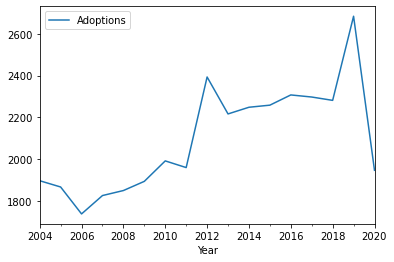

In [22]:
adoptions.plot()

Adoptions seem to have plummeted during the pandemic

<AxesSubplot:xlabel='Year'>

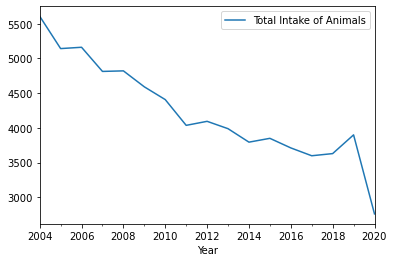

In [23]:
intake.plot()

It seems that the reason that adoptions dropped is because the number of intakes has been steadily declining.

We can check the how the efficiency of the Bloomington Shelter has changed by checking the __Adoption to Intake__ ratio

In [24]:
df['success'] = df['Adoptions'] / df['Total Intake of Animals']

In [25]:
success = df[['success']]

<AxesSubplot:xlabel='Year'>

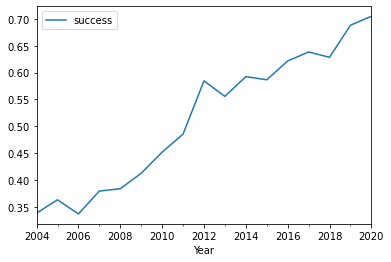

In [26]:
success.plot()

The efficency for this shelter has been steadily rising.

In [27]:
dog_model_data['breedname'].value_counts(normalize=True)

Labrador Retriever        0.171127
Bully Breed               0.119014
Beagle                    0.091197
Hound                     0.087324
Terrier                   0.075704
Other                     0.061972
German Shepherd           0.060563
Chihuahua                 0.054225
Pitbull                   0.044014
Border Collie             0.026761
Husky                     0.026761
Boxer                     0.022887
Mix                       0.014789
Rottweiler                0.012676
Coonhound                 0.011972
Golden Retriever          0.010211
Mastiff                   0.008451
Heeler                    0.008451
Australian Shepherd       0.007746
Cattle Dog                0.007394
Dachshund                 0.007042
Great Pyrenees            0.006338
Pomeranian                0.006338
Mountain Cur              0.005282
Miniature Pinscher        0.004930
Shih Tzu                  0.004577
Spaniel                   0.004577
Cocker Spaniel            0.003873
American Bulldog    

Here I just shorten the name of some of the breednames so that they dont overlap in the visualizations

In [28]:
dog_model_data['breedname'].loc[dog_model_data['breedname'] == 'Labrador Retriever'] = 'Lab'


In [29]:
dog_model_data['breedname'].loc[dog_model_data['breedname'] == 'German Shepherd'] = 'Germ Shep'

In [30]:
dog_model_data['breedname'][dog_model_data['duration of stay'] == 0].value_counts()

Bully Breed               215
Lab                       214
Hound                     131
Beagle                    103
Germ Shep                  77
Terrier                    76
Pitbull                    74
Other                      69
Chihuahua                  51
Border Collie              33
Husky                      30
Boxer                      28
Mastiff                    19
Coonhound                  18
Mix                        18
Rottweiler                 17
Cattle Dog                 12
Golden Retriever            9
Australian Shepherd         8
American Bulldog            8
Great Pyrenees              7
Dachshund                   7
Cocker Spaniel              6
Heeler                      6
Miniature Pinscher          4
Shar Pei/Mix                4
Great Dane                  3
Schnauzer                   2
Carolina Dog                2
Pointer/Mix                 2
Bloodhound                  2
Pug                         2
Shih Tzu                    2
Shiba Inu 

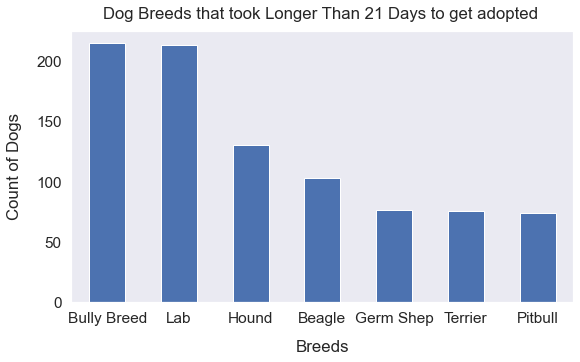

In [31]:
sns.set(font_scale=1.4)
dog_model_data['breedname'].loc[dog_model_data['duration of stay'] == 0].value_counts()[:7].plot(kind='bar', figsize=(9, 5), rot =0, grid =False)
plt.xlabel("Breeds", labelpad=14)
plt.ylabel("Count of Dogs", labelpad=14)
plt.title("Dog Breeds that took Longer Than 21 Days to get adopted ", y=1.02);


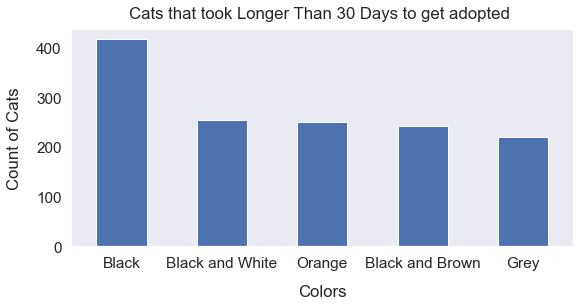

In [32]:
sns.set(font_scale=1.4)
cat_model_data['basecolour'].loc[cat_model_data['duration of stay'] == 1].value_counts()[:5].plot(kind='bar', figsize=(9, 4), rot =0, grid =False)
plt.xlabel("Colors", labelpad=14)
plt.ylabel("Count of Cats", labelpad=14)
plt.title("Cats that took Longer Than 30 Days to get adopted ", y=1.02);

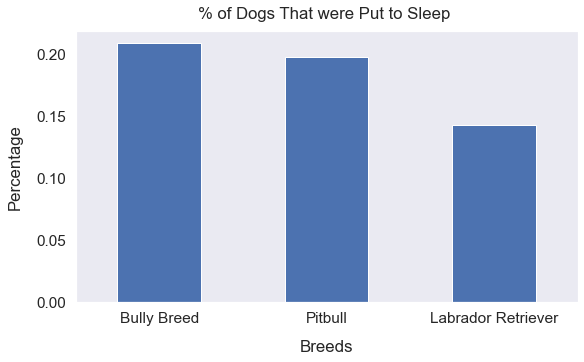

In [39]:
sns.set(font_scale=1.4)
dog_df['breedname'].loc[dog_df['puttosleep'] == True].value_counts(normalize =True)[:3].plot(kind='bar', figsize=(9, 5), rot =0, grid =False)
plt.xlabel("Breeds", labelpad=14)
plt.ylabel("Percentage", labelpad=14)
plt.title("% of Dogs That were Put to Sleep ", y=1.02);


In [34]:
pit_df = dog_model_data[dog_model_data['breedname'] == 'Pitbull']

In [35]:
pit_df['duration of stay'].value_counts(normalize=True)

0.0    0.592
1.0    0.408
Name: duration of stay, dtype: float64

60% of pitbulls take longer than 21 days to be adopted.

In [36]:
data = pd.read_csv('../data/Animal_Shelter_Animals.csv')

In [37]:
data =  data[(data['speciesname'] == 'Cat') | (data['speciesname'] == 'Dog')]

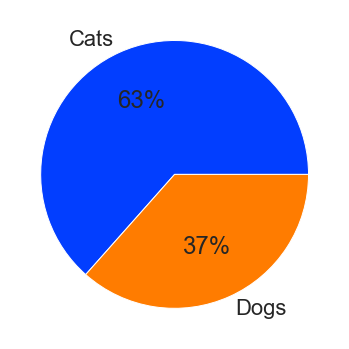

In [38]:
#Set the size of the figure
sns.set(rc={"figure.figsize":(6, 7)}) #width=6, height=5

# Set the size of the font
sns.set(font_scale=2)

#Creat the color palette
colors = sns.color_palette('bright')[0:5]

#create pie chart that contains the value_counts for dogs and cats
plt.pie(data['speciesname'].value_counts(),labels=['Cats', 'Dogs'], colors = colors, autopct='%.0f%%')
plt.show()
